## 1. Exercise

#### Instructions
Given the data from Kaggle related to survivors of the Titanic, identify if the problem is a classification problem or regression problem without visualization.

* What command would you use to identify the problem? 
* assign the result to the variable titanic_stats

In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

train_data = pd.read_csv("https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/test.csv")

## 1. Solution

In [2]:
titanic_stats = train_data['Survived'].unique() 
print(titanic_stats)

[0 1]


## 2. Exercise

#### Instructions

#### Visualizing the Age of People Aboard
Let us look at the distribution of age of people aboard.

* Remove rows that have unknown Age using .notnull() over the Age column to detect the non-null entries.
* Using the non-null entries plot the distribution using the sns.distplot() and assign the plot to variable, dist_plot.

In [8]:
# Modify the plot below and assign to the variable g
# dist_plot = sns.distplot(train_data['Age'])

## 2. Solution

/Users/harishkashyap/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


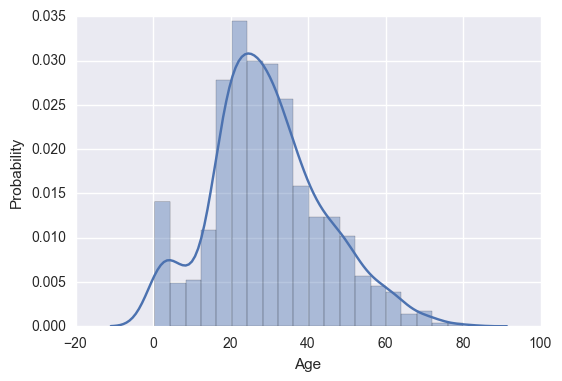

In [9]:
sns.plt.ylabel('Probability') 
dist_plot = sns.distplot(train_data[train_data['Age'].notnull()].Age)

In [10]:
def person_type(x):
  if x <=16:
    return 'C'
  elif x <= 48:
    return 'A'
  elif x <= 90:
    return 'S'
  else:
    return 'U'

The above function categorizes the continous variable 'Age' into a categorized variable. We can use apply function to transform each entry in the Age column and assign it to Person.

In [12]:
train_data['Person'] = train_data['Age'].apply(person_type)
test_data['Person'] = test_data['Age'].apply(person_type)

We can now look at who is likely to survive depending on the type of Person with a factor plot. A factor plot can consider another factor such as Sex along with the Age. 

From the above plot you can see that senior women were most likely to survive with highest probability than anyone else. Now we can ignore the Sex type and visualize who was likely to survive.

## 3. Exercise

#### Instructions
Using the information from the above graph, visualize the number of people who survived vs Person ignoring the Sex attribute. This will provide us information on who mostly survived in the dataset.

## 3. Solution

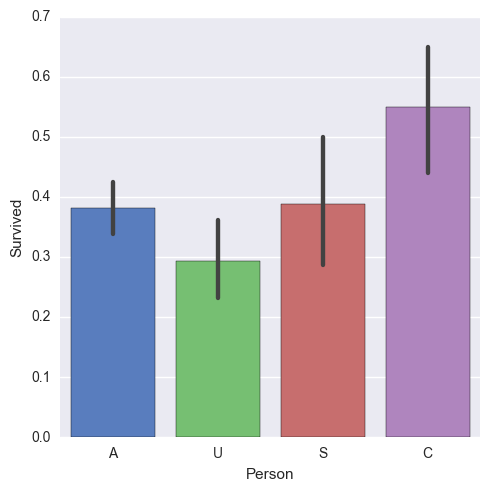

In [15]:
g = sns.factorplot(x='Person', y='Survived', data=train_data,
                   size=5, kind='bar', palette='muted')

## 4. Exercise

#### Instructions
* Generate a violin plot of type of person vs Survived for both men and women
* What do you interpret from the visualization?

In [19]:
# Modify the code below
#g = sns.violinplot(x='Pclass', y='Survived', hue='Sex', data=train_data, split=True, inner='quart', palette={'male': 'b', 'female': 'y'})

## 4. Solution

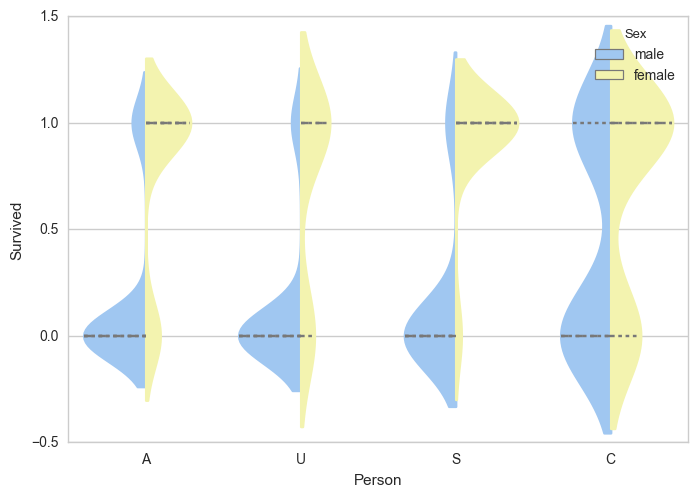

In [20]:
train_data['Person'] = train_data['Age'].apply(person_type) 
g = sns.violinplot(x='Person', y='Survived', hue='Sex', data=train_data, split=True, inner='quart', 
                                palette={'male': 'b', 'female': 'y'})

## 5. Exercise

#### Instructions
The Fare column has no sparsity and is complete.

* Generate a plot to visualize Fare just as we did visualize Age.
* Write down what bands would be able to split the Fare into.
* Assign the plot to variable fare_plot as shown in the code below. 

In [21]:
# Here is the distplot used to generate Age plot. Modify features variable for fare.
#ind_var = train_data[train_data['Age'].notnull()].Age
#fare_plot = sns.distplot(ind_var)

## 5. Solution

/Users/harishkashyap/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


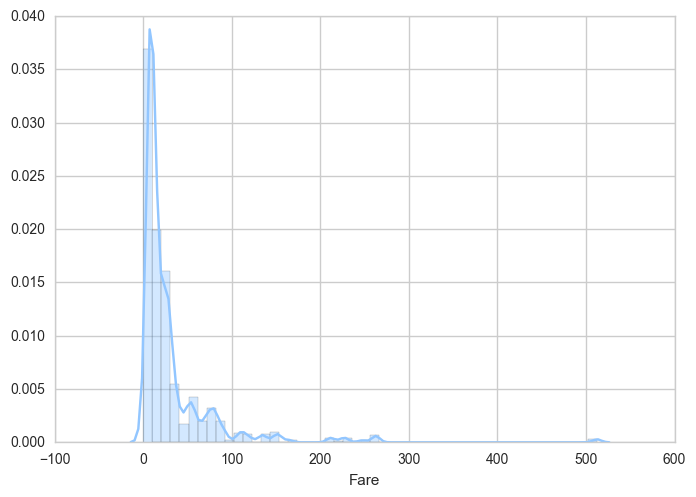

In [22]:
ind_var = train_data['Fare'] 
fare_plot = sns.distplot(ind_var)

In [27]:
miss_est = train_data[train_data['Name'].str.contains('Miss. ')].Age.mean()
master_est = train_data[train_data['Name'].str.contains('Master. ')].Age.mean()
mrs_est = train_data[train_data['Name'].str.contains('Mrs. ')].Age.mean()
mr_est = train_data[train_data['Name'].str.contains('Mr. ')].Age.mean()

In [29]:
girl_child_est = train_data[train_data['Name'].str.contains('Miss. ') & (train_data['Parch'] == 1)].Age.mean()
boy_child_est = train_data[train_data['Name'].str.contains('Master. ') & (train_data['Parch'] == 1)].Age.mean()
woman_adult_est = train_data[train_data['Name'].str.contains('Miss. ') & (train_data['Parch'] == 0)].Age.mean()
man_adult_est = train_data[train_data['Name'].str.contains('Master. ') & (train_data['Parch'] == 1)].Age.mean()
woman_married_est = train_data[train_data['Name'].str.contains('Mrs. ')].Age.mean()
man_married_est = train_data[train_data['Name'].str.contains('Mr. ')].Age.mean()

## 6. Exercise

#### Instructions
apply function on dataframes as shown in the code section below operates on every single row; i.e, every row is passed on to the impute_age function which returns the estimated age when it doesn't exist. 

* Given the math function, math.isnan(x) which returns if the result is a Nan or Not, use it at the approriate place in the code below, and create a new column called Imputed_Age to contain ages where they exist as well as imputed ages in place of NaNs.
* Assign the column Imputed_Age to variable imputed_age.
* print out first few rows using the .head() command.

In [34]:
import math
import statsmodels.api as sm
from sklearn.metrics import roc_curve, roc_auc_score

girl_child_est = train_data[train_data['Name'].str.contains('Miss. ') & (train_data['Parch'] == 1)].Age.mean()
boy_child_est = train_data[train_data['Name'].str.contains('Master. ') & (train_data['Parch'] == 1)].Age.mean()
woman_adult_est = train_data[train_data['Name'].str.contains('Miss. ') & (train_data['Parch'] == 0)].Age.mean()
man_adult_est = train_data[train_data['Name'].str.contains('Master. ') & (train_data['Parch'] == 1)].Age.mean()
woman_married_est = train_data[train_data['Name'].str.contains('Mrs. ')].Age.mean()
man_married_est = train_data[train_data['Name'].str.contains('Mr. ')].Age.mean()

# Modify and uncomment the code below to impute the age.
#def impute_age(row):
#    if ((('Miss. ') in row[3]) and (row[7] == 1)):
#      return girl_child_est
#   elif ((('Master. ') in row[3]) and (row[7] == 1)):
#      return boy_child_est
#    elif ((('Miss. ') in row[3]) and (row[7] == 0)):
#      return woman_adult_est
#    elif (('Mrs. ') in row[3]):
#      return woman_married_est
#    else:
#      return man_married_est

#train_data['Imputed_Age'] = train_data.apply(impute_age, axis=1)

## 6. Solution

In [35]:
def impute_age(row): 
    if math.isnan(row[5]): 
        if ((('Miss. ') in row[3]) and (row[7] == 1)): 
            return girl_child_est 
        elif ((('Master. ') in row[3]) and (row[7] == 1)): 
            return boy_child_est 
        elif ((('Miss. ') in row[3]) and (row[7] == 0)): 
            return woman_adult_est 
        elif (('Mrs. ') in row[3]): 
            return woman_married_est 
        else: 
            return man_married_est 
    else: 
        return row[5] 

train_data['Imputed_Age'] = train_data.apply(impute_age, axis=1) 
test_data['Imputed_Age'] = test_data.apply(impute_age, axis=1) 

imputed_age = train_data['Imputed_Age'] 
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Imputed_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,A,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,A,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,A,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,A,35.0


In [36]:
train_embarked = pd.get_dummies(train_data['Embarked'])
train_sex = pd.get_dummies(train_data['Sex'])
train_data = train_data.join([train_embarked, train_sex])
test_embarked = pd.get_dummies(test_data['Embarked'])
test_sex = pd.get_dummies(test_data['Sex'])
test_data = test_data.join([test_embarked, test_sex])
train_data['Age_Imputed']=train_data.apply(impute_age, axis=1)
test_data['Age_Imputed']=test_data.apply(impute_age, axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Imputed_Age,C,Q,S,female,male,Age_Imputed
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A,22.0,0.0,0.0,1.0,0.0,1.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,A,38.0,1.0,0.0,0.0,1.0,0.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,A,26.0,0.0,0.0,1.0,1.0,0.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,A,35.0,0.0,0.0,1.0,1.0,0.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,A,35.0,0.0,0.0,1.0,0.0,1.0,35.0


## 7. Exercise

#### Instructions
Train the logistic regression model for all input features in the same order as it is present in the dataframe columns. Use those features you think are best suited and get the predictions on training data. 

* Plot the ROC curve and assign it to the variable roc_plot. Use roc_survival variable to compute ROC.
* How different is the ROC curve from the previous ROC curve for model trained with one feature?

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score

# You dont want this to join twice if you are attempting this lesson multiple times.

try:
  train_embarked = pd.get_dummies(train_data['Embarked'])
  train_sex = pd.get_dummies(train_data['Sex'])
  train_data = train_data.join([train_embarked, train_sex])

  test_embarked = pd.get_dummies(test_data['Embarked']) 
  test_sex = pd.get_dummies(test_data['Sex'])
  test_data = test_data.join([test_embarked, test_sex])
except:
  print("The columns have categorical variables")

# Modify the features list to include the relevant features and plot the roc curve.

features = ['Fare']
log_model = sm.Logit(train_data['Survived'], train_data[features]).fit()
y_pred = log_model.predict(train_data[features])

The columns have categorical variables
Optimization terminated successfully.
         Current function value: 0.689550
         Iterations 4


## 7. Solution

Optimization terminated successfully.
         Current function value: 0.450489
         Iterations 6


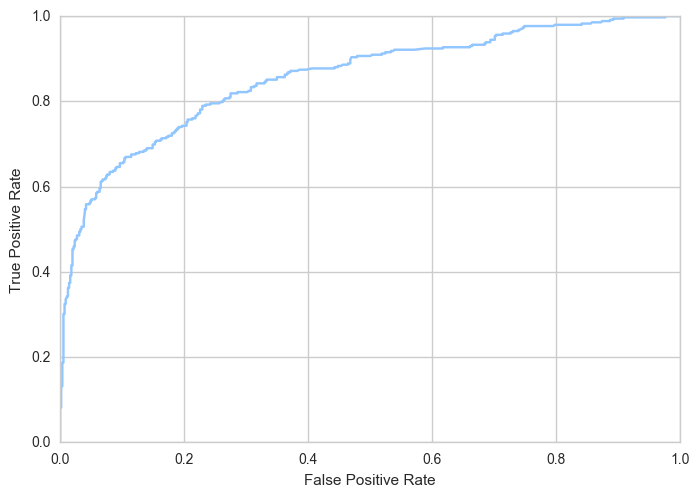

In [45]:
features = ['Pclass', 'Imputed_Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'female'] 
log_model = sm.Logit(train_data['Survived'], train_data[features]).fit() 
y_pred = log_model.predict(train_data[features]) 
roc_survival = roc_curve(train_data['Survived'], y_pred) 
sns.set_style("whitegrid") 
sns.plt.xlabel('False Positive Rate') 
sns.plt.ylabel('True Positive Rate') 
roc_plot = sns.plt.plot(roc_survival[0], roc_survival[1])

In [46]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [48]:
log_sci_model = LogisticRegression()

In [50]:
from sklearn import metrics, cross_validation
from sklearn.linear_model import LogisticRegression

# Modify the code below to include all possible features.

features = ['Fare']

log_sci_model = LogisticRegression()
log_sci_model = log_sci_model.fit(train_data[features], train_data['Survived'])
log_sci_model.score(train_data[features], train_data['Survived'])

0.66554433221099885

## 8. Exercise

#### Instructions
Train the model with all possible features.

* Assign all the list of features to the variable, features.
* Train using scikit learn logistic regression module.
* Get the prediction on the training set and print out the score.

In [51]:
from sklearn import metrics, cross_validation
from sklearn.linear_model import LogisticRegression

# Modify the code below to include all possible features.

features = ['Fare']

log_sci_model = LogisticRegression()
log_sci_model = log_sci_model.fit(train_data[features], train_data['Survived'])
log_sci_model.score(train_data[features], train_data['Survived'])

0.66554433221099885

## 8. Solution

In [52]:
features = ['Pclass', 'Imputed_Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'female'] 

log_sci_model = LogisticRegression() 
log_sci_model = log_sci_model.fit(train_data[features], train_data['Survived']) 
log_score = log_sci_model.score(train_data[features], train_data['Survived']) 
print(log_score)

0.796857463524
